# 서울시 코로나 확진자 현황

In [314]:
import pandas as pd
import numpy as np
import seaborn as sns
import platform
import folium
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm_notebook
import json
%matplotlib inline
mpl.rc('font', family='Malgun Gothic')
mpl.rc('axes', unicode_minus=False)

## 데이터정리

In [315]:
df = pd.read_csv('./data/서울시 코로나19 확진자 현황.csv',sep=',',encoding='euc-kr')
df.head()

,연번,확진일,환자번호,국적,환자정보,지역,여행력,접촉력,조치사항,상태,이동경로,등록일,수정일,노출여부
0,8966,11.30.,NaN,NaN,NaN,강북구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
1,8965,11.30.,NaN,NaN,NaN,타시도,NaN,기타 확진자 접촉,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
2,8964,11.30.,NaN,NaN,NaN,타시도,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
3,8963,11.30.,NaN,NaN,NaN,영등포구,NaN,서초구 사우나 관련,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y
4,8962,11.30.,NaN,NaN,NaN,영등포구,NaN,감염경로 조사중,NaN,NaN,NaN,2020-12-01 15:37:10,2020-12-01 15:37:10,Y


In [316]:
# 년도 추가
df['확진일'] = df['확진일'].apply(lambda x:'2020.'+ x)
df['확진일']

0       2020.11.30.
1       2020.11.30.
2       2020.11.30.
3       2020.11.30.
4       2020.11.30.
           ...     
8961     2020.1.31.
8962     2020.1.30.
8963     2020.1.30.
8964     2020.1.30.
8965     2020.1.24.
Name: 확진일, Length: 8966, dtype: object

In [317]:
# 날짜를 datetime으로 바꿈
df['확진일'] = pd.to_datetime(df['확진일'])
df['확진일']

0      2020-11-30
1      2020-11-30
2      2020-11-30
3      2020-11-30
4      2020-11-30
          ...    
8961   2020-01-31
8962   2020-01-30
8963   2020-01-30
8964   2020-01-30
8965   2020-01-24
Name: 확진일, Length: 8966, dtype: datetime64[ns]

## 확진일과 지역에 따른 확진자수 (합계순)

In [318]:
corona = pd.pivot_table(df,values='등록일',index='확진일',columns='지역',aggfunc='count').fillna(0).sort_index()

In [319]:
corona['합계'] = corona.sum(axis=1)
corona = corona.sort_values(by='합계',ascending=False)[corona.columns.difference(['타시도','기타','경기도'])]
corona

지역,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구,합계
확진일,,,,,,,,,,,,,,,,,,,,,
2020-11-25,11.0,5.0,5.0,58.0,1.0,2.0,5.0,1.0,16.0,5.0,...,7.0,16.0,12.0,3.0,4.0,4.0,1.0,0.0,7.0,212.0
2020-11-26,5.0,2.0,1.0,56.0,8.0,1.0,7.0,4.0,11.0,3.0,...,4.0,10.0,14.0,5.0,6.0,2.0,2.0,2.0,11.0,204.0
2020-11-27,8.0,3.0,1.0,23.0,9.0,1.0,5.0,3.0,7.0,3.0,...,3.0,10.0,17.0,5.0,7.0,5.0,4.0,0.0,11.0,178.0
2020-08-29,4.0,1.0,3.0,6.0,8.0,6.0,6.0,2.0,18.0,2.0,...,7.0,12.0,8.0,13.0,0.0,9.0,4.0,2.0,7.0,167.0
2020-08-27,4.0,7.0,7.0,4.0,14.0,4.0,7.0,1.0,16.0,5.0,...,7.0,16.0,3.0,7.0,4.0,9.0,3.0,2.0,4.0,160.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-04-20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-04-19,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2020-04-18,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## 확진자 추이

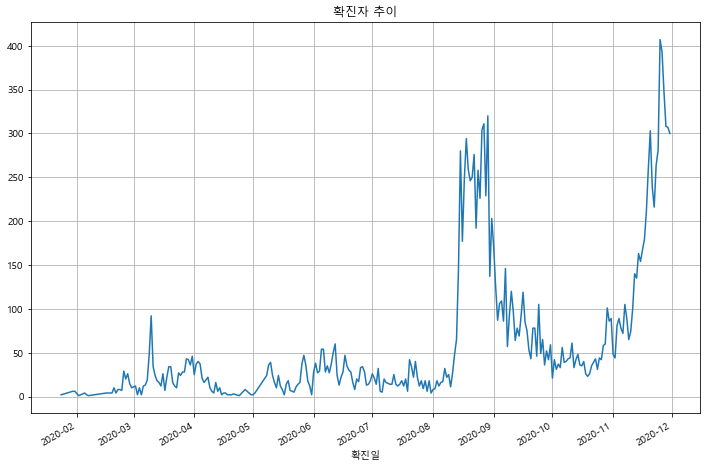

In [336]:
corona.sum(axis=1).plot(figsize=(12,8),title="확진자 추이",grid=True)
plt.show()

## 서울 지역별 누적 확진자

In [337]:
corona_region = pd.DataFrame(corona.stack()).groupby('지역').sum().rename(columns={0:'확진자'}).sort_values(by='확진자',ascending=False)[1:]
corona_region.head(10)

,확진자
지역,
송파구,611.0
강서구,604.0
관악구,547.0
강남구,520.0
노원구,478.0
서초구,472.0
성북구,464.0
동작구,389.0
은평구,361.0


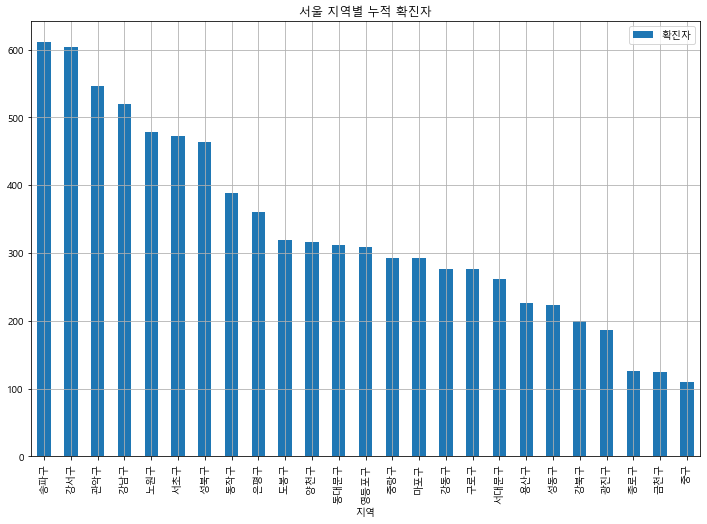

In [338]:
corona_region.plot(kind='bar',figsize=(12, 8),grid=True,title="서울 지역별 누적 확진자")
plt.show()

## 서울시 월별확진자수

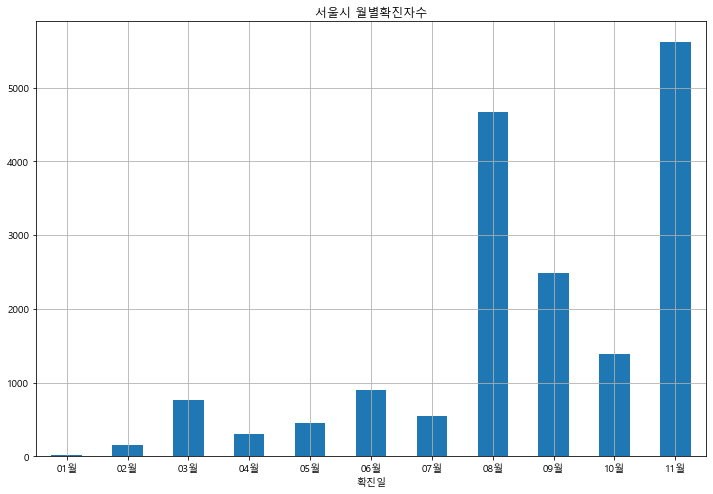

In [322]:
monthly_corona = corona.resample('MS').sum().fillna(0).T
monthly_corona.columns = monthly_corona.columns.strftime('%m월')
monthly_corona.sum().plot(kind='bar',title="서울시 월별확진자수",grid=True,figsize=(12, 8))
plt.xticks(rotation = 0 )
plt.show()

## 최근 3개월 코로나 확진자수 top 10

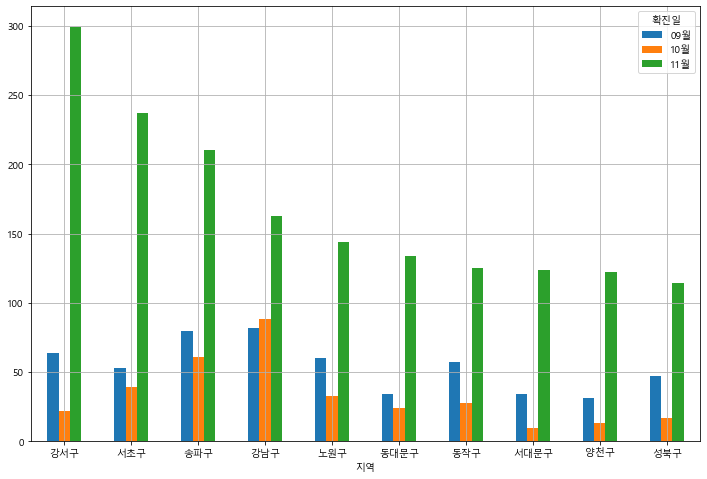

In [323]:
# plt.figure(figsize=(12,8))
monthly_corona.sort_values(by=['11월','10월','09월'],ascending=False).iloc[1:,-3:].head(10).plot(kind='bar',figsize=(12, 8),grid=True)
plt.xticks(rotation = 0 )
plt.show()

## 서울시 구별 인구수와 함침

In [324]:
pop_Seoul = pd.read_csv('report.txt',sep = "\t", engine='python',encoding='utf-8',thousands = ',')
pop_Seoul = pd.DataFrame({
    '구별':pop_Seoul['자치구'][2:],
    '인구수':pop_Seoul['인구'][2:],
})
pop_Seoul = pop_Seoul.reset_index()
del pop_Seoul['index'] 
pop_Seoul = pop_Seoul.iloc[1:]
pop_Seoul = pop_Seoul.set_index('구별')
pop_Seoul['인구수'] = pop_Seoul['인구수'].apply(pd.to_numeric)
pop_Seoul.head()

,인구수
구별,
종로구,159842
중구,135321
용산구,244953
성동구,302695
광진구,361923


In [325]:
pop_corona = pd.merge(monthly_corona,pop_Seoul,left_index=True,right_index=True,how='left')[:-1]

## 11월 인구수천명당 확진자

In [326]:
pop_corona['11월 인구수천명당 확진자'] = pop_corona['11월'] / pop_corona['인구수'] * 1000
pop_corona = pop_corona.sort_values(by='11월 인구수천명당 확진자',ascending=False)
pop_corona.head()

,01월,02월,03월,04월,05월,06월,07월,08월,09월,10월,11월,인구수,11월 인구수천명당 확진자
지역,,,,,,,,,,,,,
서초구,0.0,4.0,21.0,13.0,4.0,15.0,7.0,79.0,53.0,39.0,237.0,429995.0,0.551169
강서구,1.0,1.0,20.0,4.0,20.0,33.0,25.0,115.0,64.0,22.0,299.0,589536.0,0.507179
서대문구,0.0,4.0,9.0,6.0,8.0,8.0,6.0,52.0,34.0,10.0,124.0,323860.0,0.382881
동대문구,0.0,1.0,25.0,5.0,3.0,4.0,6.0,76.0,34.0,24.0,134.0,358679.0,0.373593
용산구,0.0,0.0,12.0,6.0,20.0,12.0,4.0,48.0,21.0,21.0,82.0,244953.0,0.334758


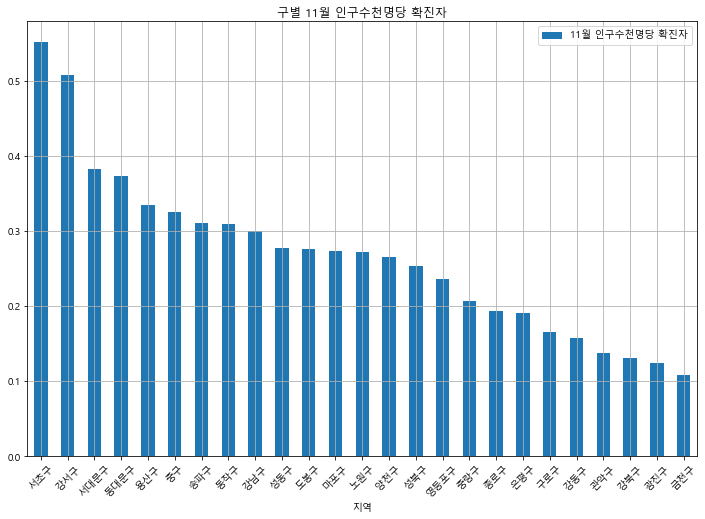

In [327]:
pop_corona[['11월 인구수천명당 확진자']].plot(kind='bar',figsize=(12,8),title='구별 11월 인구수천명당 확진자',grid=True)
plt.xticks(rotation = 45 )
plt.show()

## 지도로 표현

In [328]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='UTF-8'))
map = folium.Map(location=[37.5502,126.982],zoom_start=11,title="Your map title")
map.choropleth(geo_data = geo_str,
                data = pop_corona,
                columns=[pop_corona.index, '11월 인구수천명당 확진자'],
                fill_color = 'PuRd',
                key_on = 'feature.id')

title_html = '''
             <h3 align="center" style="font-size:20px"><b>11월 인구수천명당 확진자</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map

In [329]:
corona_region

,확진자
지역,
송파구,611.0
강서구,604.0
관악구,547.0
강남구,520.0
노원구,478.0
서초구,472.0
성북구,464.0
동작구,389.0
은평구,361.0


In [330]:
geo_path = './data/02. skorea_municipalities_geo_simple.json'
geo_str = json.load(open(geo_path, encoding='UTF-8'))
map = folium.Map(location=[37.5502,126.982],zoom_start=11,title="Your map title")
map.choropleth(geo_data = geo_str,
                data = corona_region,
                columns=[corona_region.index, '확진자'],
                fill_color = 'PuRd',
                key_on = 'feature.id')

title_html = '''
             <h3 align="center" style="font-size:20px"><b>구별 누적확진자수</b></h3>
             '''
map.get_root().html.add_child(folium.Element(title_html))
map